In [1]:
import os
print(os.getcwd())

C:\Program Files\Microsoft VS Code


In [2]:
import os

# Change to your project directory (update the path as needed)
os.chdir(r"H:\Regional_Water_Company\For_WR_Report\GWL_BED_Problem")

# Verify the change
print(os.getcwd())

H:\Regional_Water_Company\For_WR_Report\GWL_BED_Problem


In [3]:
import os
print(os.getcwd())

H:\Regional_Water_Company\For_WR_Report\GWL_BED_Problem


In [4]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("Data_For_City.xlsx")
# Show the first 5 rows
print(df.head())

  LOCATION  WATER_TABLE DATE_GREGORIAN
0      ملی        27.20     2017-02-27
1      ملی        26.51     2017-04-04
2      ملی        26.63     2017-05-16
3      ملی        30.13     2017-06-11
4      ملی        28.25     2017-07-17


In [5]:
import pandas as pd

# Read the Excel file
df = pd.read_excel("Loc.xlsx")
# Show the first 5 rows
print(df.head())

    LOCATION          X          Y
0   یکه لنگه  58.860913  36.757687
1  هاشم آباد  59.274253  36.489749
2      نومهن  59.206874  36.687374
3  مومن آباد  58.764284  36.858245
4     موچنان  58.820747  36.881811


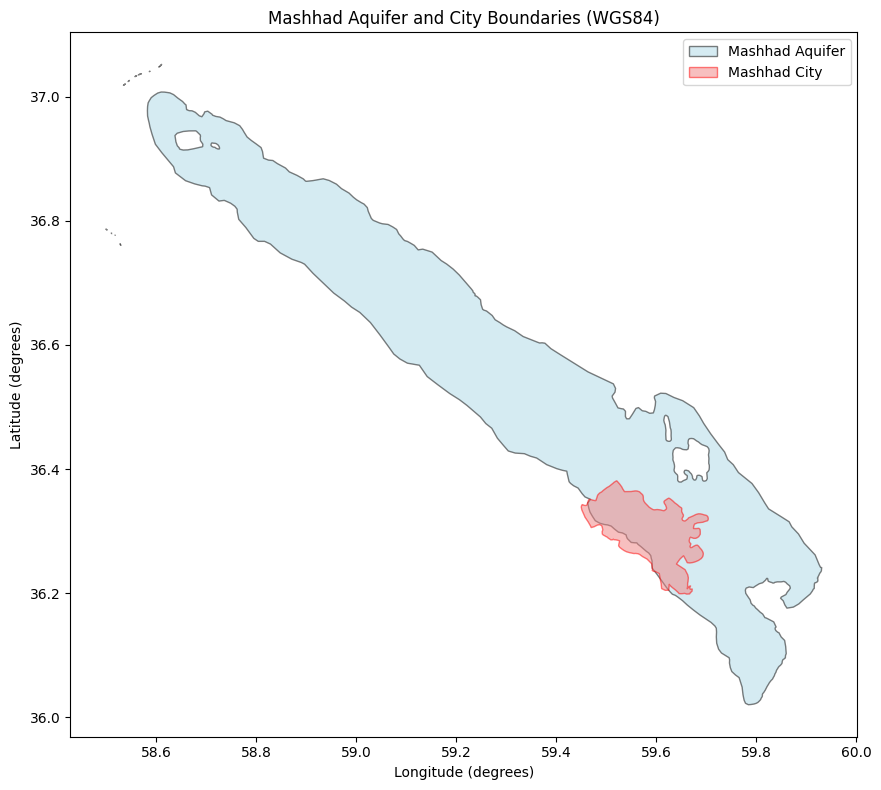

In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

# Load the shapefiles
aquifer_shapefile_path = "AQs/AQs.shp"
city_shapefile_path = "City/City.shp"
gdf_aquifer = gpd.read_file(aquifer_shapefile_path)
gdf_city = gpd.read_file(city_shapefile_path)

# Convert CRS to EPSG:4326 (WGS84, degrees)
gdf_aquifer = gdf_aquifer.to_crs(epsg=4326)
gdf_city = gdf_city.to_crs(epsg=4326)

# Filter for Mashhad
gdf_aquifer_mashhad = gdf_aquifer[gdf_aquifer['Name_AQ'] == 'Mashhad']
gdf_city_mashhad = gdf_city[gdf_city['City_Name'] == 'Mashhad']

# Check if data is empty
if gdf_aquifer_mashhad.empty:
    print("Warning: No 'Mashhad' found in aquifer shapefile 'Name_AQ' column.")
if gdf_city_mashhad.empty:
    print("Warning: No 'Mashhad' found in city shapefile 'City_Name' column.")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot aquifer shapefile
gdf_aquifer_mashhad.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.5)
gdf_city_mashhad.plot(ax=ax, color='lightcoral', edgecolor='red', alpha=0.5)

# Manually create legend patches
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightblue', edgecolor='black', alpha=0.5, label='Mashhad Aquifer'),
    Patch(facecolor='lightcoral', edgecolor='red', alpha=0.5, label='Mashhad City')
]

# Add the legend
ax.legend(handles=legend_elements)

# Customize the plot
plt.title('Mashhad Aquifer and City Boundaries (WGS84)')
plt.xlabel('Longitude (degrees)')
plt.ylabel('Latitude (degrees)')
plt.tight_layout()

# Show the plot
plt.show()